In [1]:
# =========================
# Load the data
# =========================
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)

# Normalize pixel values (scale between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step
Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)


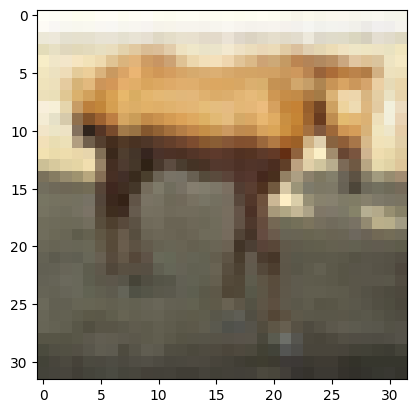

In [2]:
from matplotlib import pyplot as plt
plt.imshow(x_train[2000])
plt.show()

In [2]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

In [4]:
# Define Architecture
model = Sequential()
# Add Input Layer
model.add(Input(shape=(32,32,3))) # shape h, w and channel
# Add Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# add Faltten layer
model.add(Flatten())

# Add fully connected layer
model.add(Dense(50,activation='relu'))
# add output layer
model.add(Dense(10,activation='softmax'))
# compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
# check summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,640 (111.88 KB)

 Trainable params: 28,640 (111.88 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
training_history = model.fit(x_train, y_train, 
                             epochs=10, 
                             validation_split=0.2, 
                             batch_size=64) 

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.3302 - loss: 1.7990 - val_accuracy: 0.4304 - val_loss: 1.5488
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4689 - loss: 1.4623 - val_accuracy: 0.4864 - val_loss: 1.3970
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.5061 - loss: 1.3613 - val_accuracy: 0.5151 - val_loss: 1.3265
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.5349 - loss: 1.2982 - val_accuracy: 0.5408 - val_loss: 1.2694
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.5608 - loss: 1.2258 - val_accuracy: 0.5693 - val_loss: 1.2140
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5846 - loss: 1.1663 - val_accuracy: 0.5820 - val_loss: 1.1652
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6038 - loss: 1.1173 - val_accuracy: 0.5915 - val_loss: 1.1435
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6176 - loss: 1.0760 -

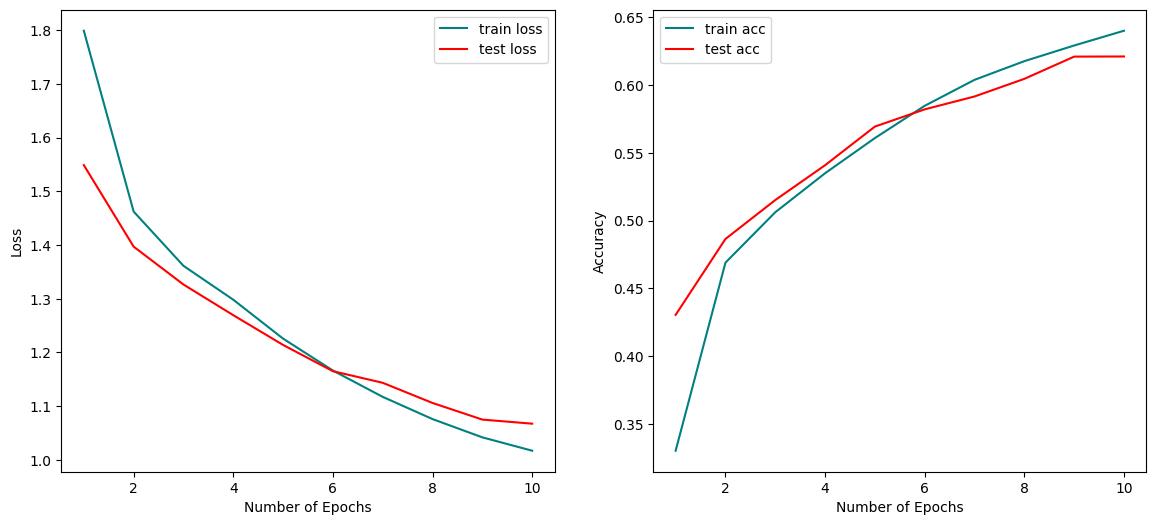

In [6]:
train_acc = training_history.history['accuracy']
test_acc = training_history.history['val_accuracy']
train_loss = training_history.history['loss']
test_loss = training_history.history['val_loss']
epochs=10
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_loss,label = "train loss",color='teal')
plt.plot(range(1,epochs+1),test_loss,label = "test loss",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),train_acc,label = "train acc",color='teal')
plt.plot(range(1,epochs+1),test_acc,label = "test acc",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [3]:
## External Data
test_dir = 'dataset/dataset/test_set/'
train_dir = 'dataset/dataset/training_set/'

# load the data 
from tensorflow.keras.utils import image_dataset_from_directory
train_ds = image_dataset_from_directory(train_dir,
                                       batch_size=32,image_size=(150,150),shuffle=True)

test_ds = image_dataset_from_directory(test_dir,
                                       batch_size=32,image_size=(150,150))
# define the model
# Define Architecture
model = Sequential()
# Add Input Layer
model.add(Input(shape=(150,150,3))) # shape h, w and channel
# Add Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# add Faltten layer
model.add(Flatten())

# Add fully connected layer
model.add(Dense(50,activation='relu'))
# add output layer
model.add(Dense(1,activation='sigmoid'))
# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
# check summary
model.summary()


# fit the model
training_history = model.fit(train_ds,
                            epochs=10,
                            validation_data=test_ds,
                            batch_size=32)


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       231,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,181 (1000.71 KB)

 Trainable params: 256,181 (1000.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 341ms/step - accuracy: 0.5185 - loss: 0.8396 - val_accuracy: 0.5325 - val_loss: 0.6910
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 277ms/step - accuracy: 0.5479 - loss: 0.6810 - val_accuracy: 0.5270 - val_loss: 0.6924
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 426ms/step - accuracy: 0.5853 - loss: 0.6548 - val_accuracy: 0.5290 - val_loss: 0.7037
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 140s 419ms/step - accuracy: 0.5935 - loss: 0.6452 - val_accuracy: 0.5235 - val_loss: 0.7033
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 370ms/step - accuracy: 0.6086 - loss: 0.6223 - val_accuracy: 0.5270 - val_loss: 0.7825
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 381ms/step - accuracy: 0.6445 - loss: 0.5825 - val_accuracy: 0.5430 - val_loss: 0.7381
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 417ms/step - accuracy: 0.6704 - loss: 0.5454 - val_accuracy: 0.5345 - val_loss: 0.8309
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 145s 431ms/step - accuracy: 0.6925 - los

In [5]:
from pyplot import pyplot as plt
train_acc = training_history.history['accuracy']
test_acc = training_history.history['val_accuracy']
train_loss = training_history.history['loss']
test_loss = training_history.history['val_loss']
epochs=10
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_loss,label = "train loss",color='teal')
plt.plot(range(1,epochs+1),test_loss,label = "test loss",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),train_acc,label = "train acc",color='teal')
plt.plot(range(1,epochs+1),test_acc,label = "test acc",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'pyplot'